# Рекуррентные нейронные сети

In [1]:
import keras
print(keras.__version__)
from keras.layers import SimpleRNN

Using TensorFlow backend.


2.3.1


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
# Пример архитектуры с одним рекуррентным слоем
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(20))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                1060      
Total params: 321,060
Trainable params: 321,060
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Пример архитектуры с несколькими рекуррентными слоями
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(33, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 33)          2178      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2112      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,450
Trainable params: 328,450
Non-trainable params: 0
_________________________________________________________________


### Классификация отзывов к фильмам (положительные/отрицательные) с помощью RNN

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# Максимальное количество используемых слов
max_features = 10000 
# Ограничение длины входных последовательностей
maxlen = 600  
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('Train reviews:', len(input_train))
print('Test reviews:', len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Train shape:', input_train.shape)
print('Train labels shape:', y_train.shape)
print('Test shape:', input_test.shape)

Train reviews: 25000
Test reviews: 25000
Train shape: (25000, 600)
Train labels shape: (25000,)
Test shape: (25000, 600)


In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 20))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test, y_test))

C:\Users\Admin\.conda\envs\tensorflow-37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.6819 - acc: 0.5519 - val_loss: 0.6358 - val_acc: 0.6476
Epoch 2/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.4689 - acc: 0.7832 - val_loss: 0.4466 - val_acc: 0.7984
Epoch 3/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.3209 - acc: 0.8671 - val_loss: 0.3428 - val_acc: 0.8588
Epoch 4/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.2507 - acc: 0.8991 - val_loss: 0.4227 - val_acc: 0.8217
Epoch 5/10
25000/25000 [==============================] - 68s 3ms/step - loss: 0.2085 - acc: 0.9183 - val_loss: 0.3970 - val_acc: 0.8368
Epoch 6/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.1497 - acc: 0.9451 - val_loss: 0.5450 - val_acc: 0.7930
Epoch 7/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.1121 - acc: 0.9603 - val_loss: 0.4805 - val_acc

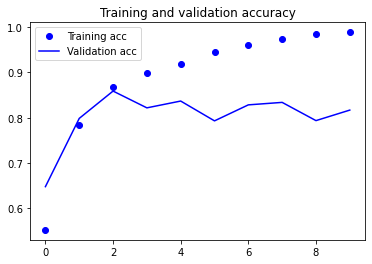

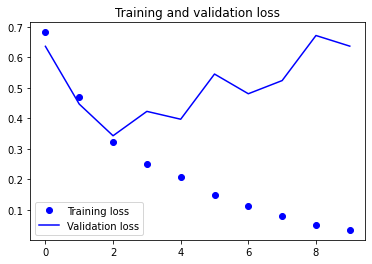

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()